In [49]:
from data_utils import compute_mode_coefficients_from_complex_field
from psf_constants import VALIDATION_COMPLEX_FIELDS_PATH, COMPLEX_NUMBER_NORMALIZATION_CONSTANT

import numpy as np

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:222: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:224: RuntimeWarning: invalid value encountered in divide
  field_sin_cart = field_sin_cart / np.sqrt(np.sum(field_sin_cart**2))


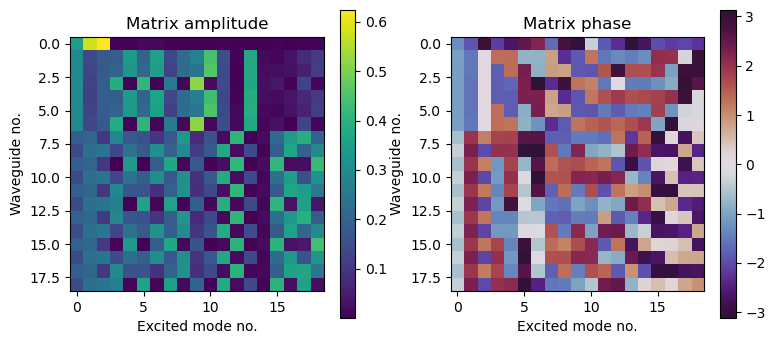

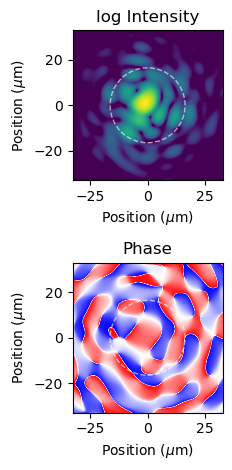

In [4]:
mode_coefficients_list = compute_mode_coefficients_from_complex_field(VALIDATION_COMPLEX_FIELDS_PATH)

In [5]:
len(mode_coefficients_list)

10000

In [8]:
mode_coefficients_list[0].shape

(19,)

In [14]:
np_mode_coefficients = np.stack(mode_coefficients_list)

In [16]:
np.save('validation_mode_coefficients.npy', np_mode_coefficients)

In [15]:
def compute_L2_norms(complex_vectors_list):
    L2_norm_list = []
    for complex_vector in complex_vectors_list:
        L2_norm = np.linalg.norm(complex_vector)
        L2_norm_list.append(L2_norm)
        
    return L2_norm_list

In [18]:
L2_norm_list = compute_L2_norms(np_mode_coefficients)

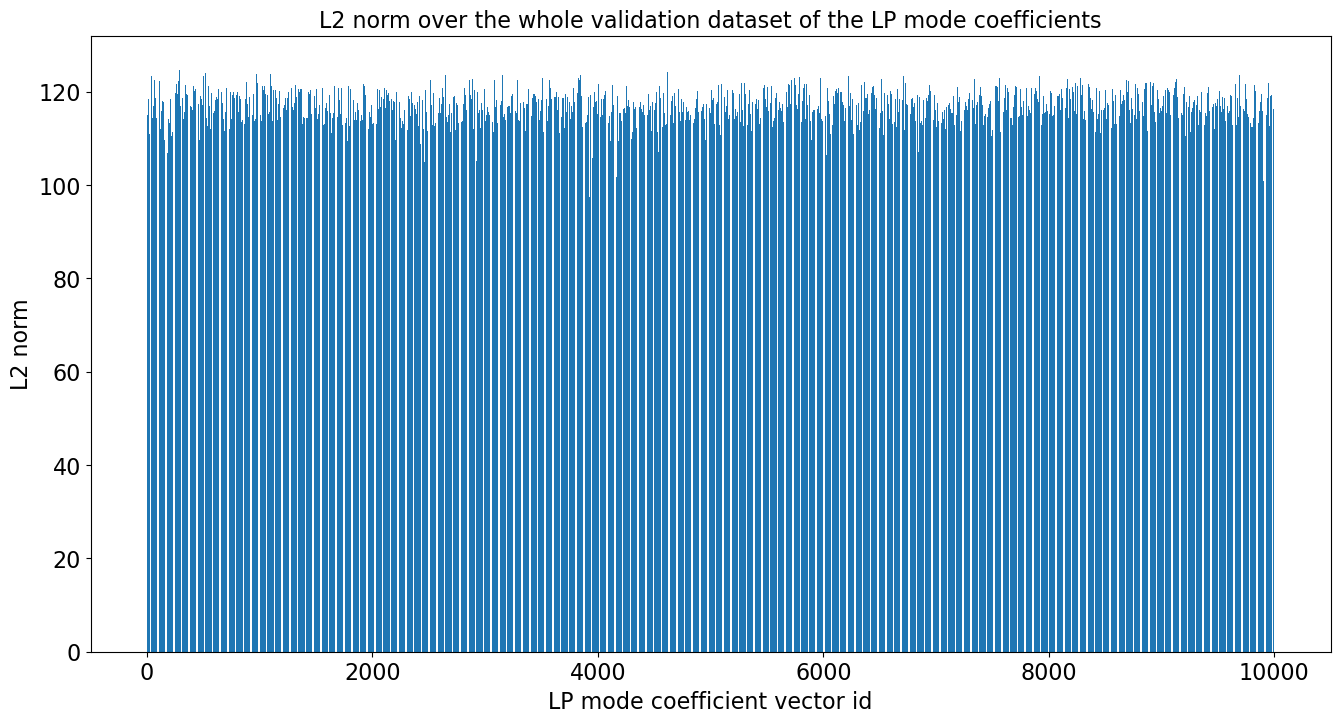

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 10001)], L2_norm_list)
plt.xlabel('LP mode coefficient vector id', fontsize=16)
plt.ylabel('L2 norm', fontsize=16)
plt.title('L2 norm over the whole validation dataset of the LP mode coefficients',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [46]:
validation_psf_electric_fields = np.load(VALIDATION_COMPLEX_FIELDS_PATH)
validation_psf_electric_fields.shape

(10000, 128, 128)

In [47]:
validation_psf_electric_fields = validation_psf_electric_fields.reshape(10000, 128*128)
validation_psf_electric_fields.shape

(10000, 16384)

In [50]:
electric_fields_l2_norms_list = compute_L2_norms(validation_psf_electric_fields/COMPLEX_NUMBER_NORMALIZATION_CONSTANT)

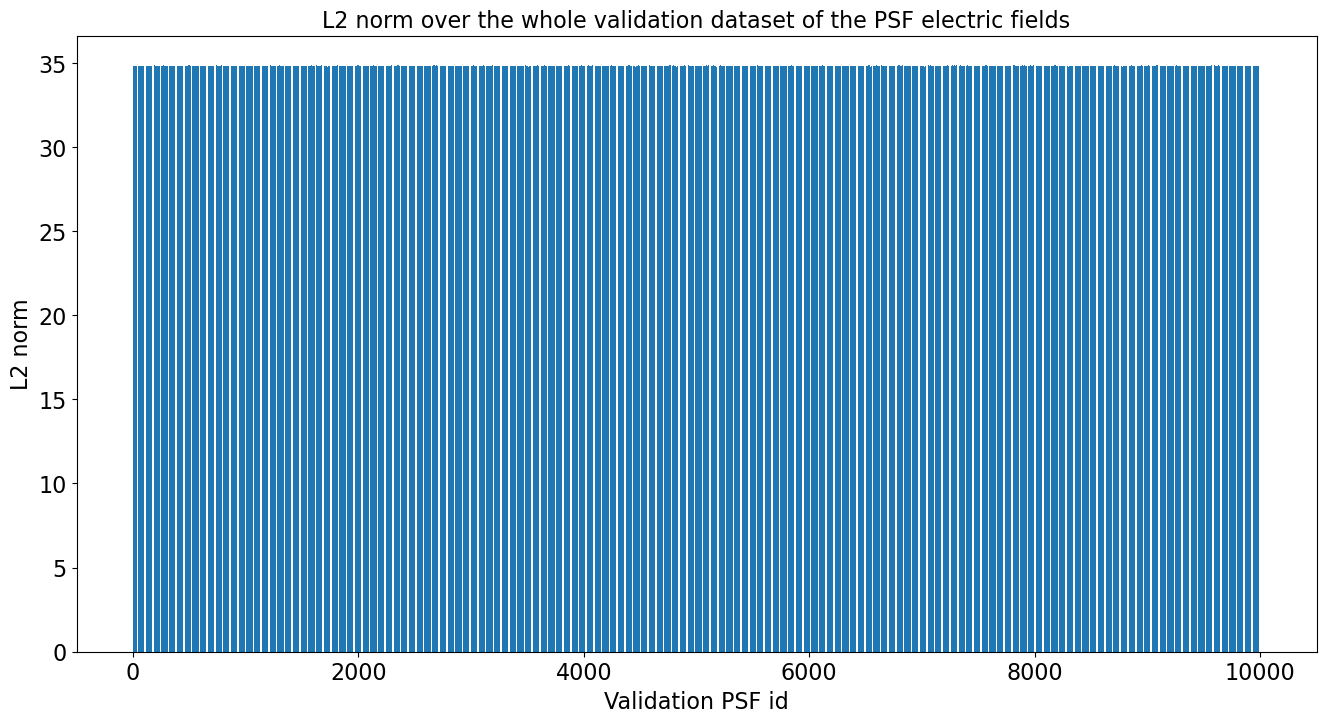

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 10001)], electric_fields_l2_norms_list)
plt.xlabel('Validation PSF id', fontsize=16)
plt.ylabel('L2 norm', fontsize=16)
plt.title('L2 norm over the whole validation dataset of the PSF electric fields',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [52]:
correlation_coefficient = np.corrcoef(L2_norm_list, electric_fields_l2_norms_list)[0, 1]

print("Pearson correlation coefficient:", correlation_coefficient)

Pearson correlation coefficient: 0.1451513895198259
